In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-07 02:22:01--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.61MB/s    in 2m 46s  

2021-04-07 02:24:48 (1.86 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [3]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
# Penggunaan Callback mencegah overfitting dan menghentikan training setelah akurasi terpenuhi
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.98):
      self.model.stop_training = True

callbacks = myCallback()

In [5]:
#Membuat Direktori
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
roc_dir = os.path.join(base_dir,'rock')
pap_dir = os.path.join(base_dir, 'paper')
sci_dir = os.path.join(base_dir, 'scissors')

In [7]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [8]:
train_roc = os.path.join(train_dir, 'rock')
train_pap = os.path.join(train_dir, 'paper')
train_sci = os.path.join(train_dir, 'scissors')
val_roc = os.path.join(validation_dir, 'rock')
val_pap = os.path.join(validation_dir, 'paper')
val_sci = os.path.join(validation_dir, 'scissors')

In [9]:
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sci)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sci)

In [10]:
from sklearn.model_selection import train_test_split

# memecah setiap direktori menjadi data train dan data validasi(validation 40% of dataset)
train_roc_dir, val_roc_dir = train_test_split(os.listdir(roc_dir), test_size = 0.40)
train_pap_dir, val_pap_dir = train_test_split(os.listdir(pap_dir), test_size = 0.40)
train_sci_dir, val_sci_dir = train_test_split(os.listdir(sci_dir), test_size = 0.40)

In [11]:
import shutil
for file in train_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(train_roc, file))
for file in train_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(train_pap,file))
for file in train_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(train_sci,file))
for file in val_roc_dir:
  shutil.copy(os.path.join(roc_dir, file), os.path.join(val_roc,file))
for file in val_pap_dir:
  shutil.copy(os.path.join(pap_dir,file), os.path.join(val_pap,file))
for file in val_sci_dir:
  shutil.copy(os.path.join(sci_dir,file), os.path.join(val_sci,file))

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)


In [13]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 16,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])


In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, 
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 23, 
    verbose =2,
    callbacks=[callbacks]
)

Epoch 1/30
41/41 - 74s - loss: 0.9226 - accuracy: 0.5739 - val_loss: 0.8464 - val_accuracy: 0.6766
Epoch 2/30
41/41 - 71s - loss: 0.4365 - accuracy: 0.8392 - val_loss: 0.3707 - val_accuracy: 0.8505
Epoch 3/30
41/41 - 71s - loss: 0.2944 - accuracy: 0.8948 - val_loss: 0.2095 - val_accuracy: 0.9293
Epoch 4/30
41/41 - 71s - loss: 0.2115 - accuracy: 0.9192 - val_loss: 0.2575 - val_accuracy: 0.9130
Epoch 5/30
41/41 - 71s - loss: 0.1831 - accuracy: 0.9390 - val_loss: 0.0853 - val_accuracy: 0.9647
Epoch 6/30
41/41 - 72s - loss: 0.1054 - accuracy: 0.9672 - val_loss: 0.0844 - val_accuracy: 0.9701
Epoch 7/30
41/41 - 71s - loss: 0.0993 - accuracy: 0.9611 - val_loss: 0.1688 - val_accuracy: 0.9375
Epoch 8/30
41/41 - 71s - loss: 0.0831 - accuracy: 0.9703 - val_loss: 0.1078 - val_accuracy: 0.9701
Epoch 9/30
41/41 - 71s - loss: 0.0686 - accuracy: 0.9748 - val_loss: 0.1396 - val_accuracy: 0.9701
Epoch 10/30
41/41 - 71s - loss: 0.0519 - accuracy: 0.9855 - val_loss: 0.1904 - val_accuracy: 0.9511


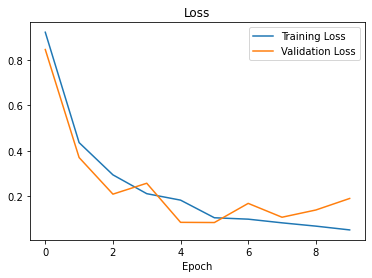

In [16]:
import matplotlib.pyplot as plt

#loss train & validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

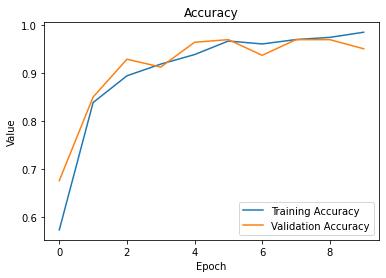

In [17]:
#accuracy train & validation
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw.png
1Tt9U9SzrOm98Xtw.png
paper


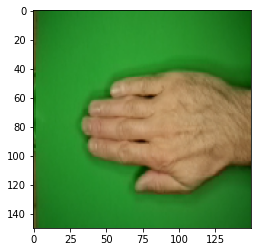

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')